# Phase 4

### Unsupervised ML (Clustering)

Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

### 4.1 "Create 3 clusters as below

- Sensitive Area's
- Moderate Area's
- Peaceful Area's"

### 4.2 Create DataFrame for each cluster that shows data according to the areas.

### 4.3 "Analyse your clusters and prepare a report that explains all your observations.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('District_wise_crimes_committed_IPC_2001_2012.csv')

In [3]:
df.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [4]:
df.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT TO MURDER',
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
 'RAPE',
 'CUSTODIAL RAPE',
 'OTHER RAPE',
 'KIDNAPPING & ABDUCTION',
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
 'KIDNAPPING AND ABDUCTION OF OTHERS',
 'DACOITY',
 'PREPARATION AND ASSEMBLY FOR DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO THEFT',
 'OTHER THEFT',
 'RIOTS',
 'CRIMINAL BREACH OF TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT',
 'DOWRY DEATHS',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR HIS RELATIVES',
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
 'CAUSING DEATH BY NEGLIGENCE',
 'OTHER IPC CRIMES',
 'TOTAL IPC CRIMES']

In [5]:
df.rename(columns={'STATE/UT': 'StateUT', 'DISTRICT': 'District', 'YEAR': 'Year', 'MURDER': 'Murder',
                   'ATTEMPT TO MURDER': 'AttemptToMurder', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER': 'CulpableHomicide',
                   'RAPE': 'Rape', 'CUSTODIAL RAPE': 'CustodialRape', 'OTHER RAPE': 'OtherRape',
                   'KIDNAPPING & ABDUCTION': 'KidnappingAbduction', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS': 'KidnappingAbductionWomen',
                   'KIDNAPPING AND ABDUCTION OF OTHERS': 'KidnappingAbductionOthers', 'PREPARATION AND ASSEMBLY FOR DACOITY': 'PreparationAssemblyDacoity',
                   'DACOITY': 'Dacoity', 'ROBBERY': 'Robbery', 'BURGLARY': 'Burglary', 'THEFT': 'Theft',
                   'AUTO THEFT': 'AutoTheft', 'OTHER THEFT': 'OtherTheft', 'RIOTS': 'Riots',
                   'CRIMINAL BREACH OF TRUST': 'CriminalBreachOfTrust', 'CHEATING': 'Cheating',
                   'COUNTERFIETING': 'Counterfieting', 'ARSON': 'Arson', 'HURT/GREVIOUS HURT': 'Hurt',
                   'DOWRY DEATHS': 'DowryDeaths', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY': 'AssaultWomen',
                   'INSULT TO MODESTY OF WOMEN': 'InsultToModestyOfWomen','CRUELTY BY HUSBAND OR HIS RELATIVES':'CrueltyByHusbandHisRelatives',
                   'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES': 'ImportationGirlsFromForeignCountries',
                   'CAUSING DEATH BY NEGLIGENCE': 'CausingDeathByNegligence', 'OTHER IPC CRIMES': 'OtherIPCcrimes',
                   'TOTAL IPC CRIMES': 'TotalIPCcrimes'}, inplace=True)


In [6]:
df

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Arson,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,WEST BENGAL,BDN CP,2012,15,35,4,13,0,13,53,...,0,0,9,58,8,320,0,0,1765,3446
804,WEST BENGAL,BKP CP,2012,89,49,18,36,0,36,214,...,0,143,20,88,2,989,0,124,2961,6608
805,WEST BENGAL,JHARGRAM,2012,30,23,5,21,0,21,21,...,1,11,6,28,0,47,0,51,264,711
806,WEST BENGAL,SILIGURI_PC,2012,32,6,6,21,0,21,123,...,3,812,3,35,12,370,0,69,385,3023


In [7]:
df['StateUT'] = df['StateUT'].str.capitalize()

In [8]:
df['District'] = df['District'].str.capitalize()

In [9]:
df

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Arson,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes
0,Andhra pradesh,Adilabad,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra pradesh,Anantapur,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra pradesh,Chittoor,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra pradesh,Cuddapah,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra pradesh,East godavari,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,West bengal,Bdn cp,2012,15,35,4,13,0,13,53,...,0,0,9,58,8,320,0,0,1765,3446
804,West bengal,Bkp cp,2012,89,49,18,36,0,36,214,...,0,143,20,88,2,989,0,124,2961,6608
805,West bengal,Jhargram,2012,30,23,5,21,0,21,21,...,1,11,6,28,0,47,0,51,264,711
806,West bengal,Siliguri_pc,2012,32,6,6,21,0,21,123,...,3,812,3,35,12,370,0,69,385,3023


In [10]:
df.dtypes

StateUT                                 object
District                                object
Year                                     int64
Murder                                   int64
AttemptToMurder                          int64
CulpableHomicide                         int64
Rape                                     int64
CustodialRape                            int64
OtherRape                                int64
KidnappingAbduction                      int64
KidnappingAbductionWomen                 int64
KidnappingAbductionOthers                int64
Dacoity                                  int64
PreparationAssemblyDacoity               int64
Robbery                                  int64
Burglary                                 int64
Theft                                    int64
AutoTheft                                int64
OtherTheft                               int64
Riots                                    int64
CriminalBreachOfTrust                    int64
Cheating     

In [11]:
df.drop_duplicates()

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Arson,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes
0,Andhra pradesh,Adilabad,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra pradesh,Anantapur,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra pradesh,Chittoor,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra pradesh,Cuddapah,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra pradesh,East godavari,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,West bengal,Bdn cp,2012,15,35,4,13,0,13,53,...,0,0,9,58,8,320,0,0,1765,3446
804,West bengal,Bkp cp,2012,89,49,18,36,0,36,214,...,0,143,20,88,2,989,0,124,2961,6608
805,West bengal,Jhargram,2012,30,23,5,21,0,21,21,...,1,11,6,28,0,47,0,51,264,711
806,West bengal,Siliguri_pc,2012,32,6,6,21,0,21,123,...,3,812,3,35,12,370,0,69,385,3023


In [12]:
df.shape

(808, 33)

In [13]:
for i in df:
    print(df[i].value_counts())

StateUT
Uttar pradesh        74
Madhya pradesh       53
Rajasthan            47
Maharashtra          46
Bihar                44
Tamil nadu           42
Odisha               36
Gujarat              36
Punjab               35
Andhra pradesh       35
Jammu & kashmir      35
Karnataka            34
Assam                33
West bengal          30
Chhattisgarh         29
Jharkhand            26
Kerala               25
Haryana              24
Delhi ut             21
Arunachal pradesh    17
Uttarakhand          13
Himachal pradesh     12
Manipur              12
Nagaland             11
Mizoram               8
Meghalaya             7
Tripura               5
Sikkim                4
A & n islands         4
Puducherry            3
Daman & diu           2
Goa                   2
Chandigarh            1
D & n haveli          1
Lakshadweep           1
Name: count, dtype: int64
District
Adilabad              1
Trichy urban          1
Thanjavur             1
Theni                 1
Thirunelveli rural   

In [14]:
df.nunique().to_frame('No of unique values')

,No of unique values
StateUT,35
District,808
Year,12
Murder,165
AttemptToMurder,159
CulpableHomicide,47
Rape,100
CustodialRape,2
OtherRape,100
KidnappingAbduction,139


In [15]:
df.isnull().sum()

StateUT                                 0
District                                0
Year                                    0
Murder                                  0
AttemptToMurder                         0
CulpableHomicide                        0
Rape                                    0
CustodialRape                           0
OtherRape                               0
KidnappingAbduction                     0
KidnappingAbductionWomen                0
KidnappingAbductionOthers               0
Dacoity                                 0
PreparationAssemblyDacoity              0
Robbery                                 0
Burglary                                0
Theft                                   0
AutoTheft                               0
OtherTheft                              0
Riots                                   0
CriminalBreachOfTrust                   0
Cheating                                0
Counterfieting                          0
Arson                             

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   StateUT                               808 non-null    object
 1   District                              808 non-null    object
 2   Year                                  808 non-null    int64 
 3   Murder                                808 non-null    int64 
 4   AttemptToMurder                       808 non-null    int64 
 5   CulpableHomicide                      808 non-null    int64 
 6   Rape                                  808 non-null    int64 
 7   CustodialRape                         808 non-null    int64 
 8   OtherRape                             808 non-null    int64 
 9   KidnappingAbduction                   808 non-null    int64 
 10  KidnappingAbductionWomen              808 non-null    int64 
 11  KidnappingAbductionOthers       

In [17]:
df.describe()

,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,KidnappingAbductionWomen,KidnappingAbductionOthers,...,Arson,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,2002.225248,52.897277,45.862624,5.011139,24.548267,0.001238,24.547030,36.674505,24.389851,12.284653,...,15.433168,427.377475,10.034653,53.622525,16.148515,82.313119,0.154703,94.647277,1091.195545,2780.164604
std,2.974698,103.506062,77.897685,10.069209,40.704608,0.035180,40.704731,83.223065,53.254110,33.357969,...,36.681225,1324.301266,19.972876,137.867418,86.978926,225.904773,1.818146,284.699987,1871.299904,5640.605685
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,17.750000,10.000000,0.000000,6.000000,0.000000,6.000000,7.000000,4.000000,1.000000,...,2.000000,31.000000,0.000000,8.000000,0.000000,7.000000,0.000000,0.000000,225.750000,713.750000
50%,2001.000000,36.000000,27.000000,1.000000,16.000000,0.000000,16.000000,19.000000,12.000000,5.000000,...,8.000000,191.500000,4.000000,28.000000,2.000000,36.000000,0.000000,45.000000,635.000000,1844.500000
75%,2001.000000,65.000000,56.250000,5.000000,34.000000,0.000000,34.000000,42.250000,28.000000,13.000000,...,21.000000,517.250000,12.000000,65.000000,12.000000,102.000000,0.000000,124.250000,1331.500000,3508.000000
max,2012.000000,2602.000000,1555.000000,136.000000,871.000000,1.000000,871.000000,1627.000000,964.000000,663.000000,...,872.000000,34947.000000,420.000000,3544.000000,2271.000000,5791.000000,39.000000,7400.000000,34344.000000,130089.000000


In [18]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    """
    Encode categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df: DataFrame
    - columns: list of column names to be encoded

    Returns:
    - DataFrame: DataFrame with encoded columns
    - dict: Mapping of label encoders for each column
    """

    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

encoded_df, encoders = encode_categorical_columns(df, ['StateUT','District','Year'])
encoders

{'StateUT': LabelEncoder(), 'District': LabelEncoder(), 'Year': LabelEncoder()}

In [19]:
df= encoded_df

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalize/Scale the selected features
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-1.69079759, -1.71704673, -0.41214482, ...,  0.30349917,
         0.2282204 ,  0.24371254],
       [-1.69079759, -1.60986529, -0.41214482, ...,  0.61630257,
        -0.18030482,  0.23856806],
       [-1.69079759, -1.06967081, -0.41214482, ...,  1.087265  ,
         0.09133237,  0.53889904],
       ...,
       [ 1.52439474, -0.22079377,  3.2879998 , ..., -0.15340469,
        -0.44231707, -0.36706097],
       [ 1.52439474,  1.21115032,  3.2879998 , ..., -0.09014107,
        -0.37761609,  0.04307796],
       [-1.78822766, -1.18542677,  3.2879998 , ..., -0.32913694,
        -0.57920511, -0.48893184]])

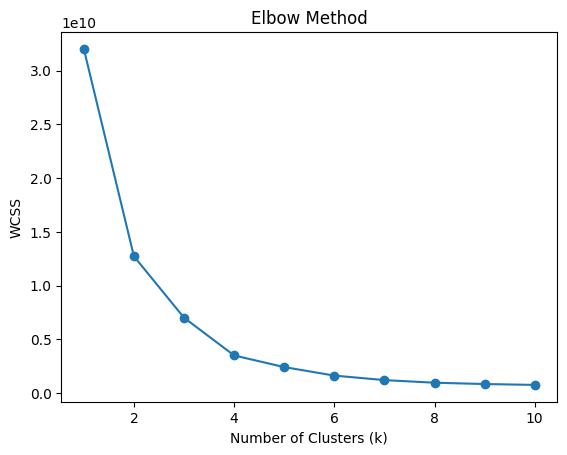

In [21]:
from sklearn.cluster import KMeans
wcss_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3,random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
for k in range(1, 4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
print(f'Number of clusters: {k}, Unique labels: {np.unique(y_kmeans)}')

Number of clusters: 3, Unique labels: [0 1 2]


In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(X_scaled,y_kmeans)

0.8548962334443412

In [26]:
df['Cluster'] = y_kmeans

In [27]:
centroids = kmeans.cluster_centers_

In [28]:
centroids

array([[ 3.12671685e-03,  1.86866776e-05,  4.71781058e-04,
        -4.38158185e-02, -3.99546023e-02, -2.35063009e-02,
        -4.47339136e-02,  2.19188463e-04, -4.47339676e-02,
        -4.66503801e-02, -4.22132689e-02, -4.89945166e-02,
        -2.95965570e-02, -3.64764892e-02, -5.39061875e-02,
        -6.21855252e-02, -6.85274298e-02, -6.18574287e-02,
        -6.85731264e-02, -2.09594440e-02, -5.94026087e-02,
        -5.84305785e-02, -6.27583923e-02, -2.95152472e-02,
        -4.34701168e-02, -3.48026317e-02, -4.18648672e-02,
        -3.54903650e-02, -3.45935272e-02, -4.95281194e-03,
        -3.88832820e-02, -5.00937846e-02, -5.69663823e-02],
       [-1.69079759e+00,  1.49839659e+00, -4.12144821e-01,
         2.46428233e+01,  1.93853274e+01,  1.30169106e+01,
         2.08078658e+01, -3.52016672e-02,  2.08078333e+01,
         1.37706403e+01,  1.39157123e+01,  1.21400085e+01,
         1.43336279e+01,  7.83784085e-01,  1.24260472e+01,
         2.00974433e+01,  1.41567344e+01,  7.51066654e+

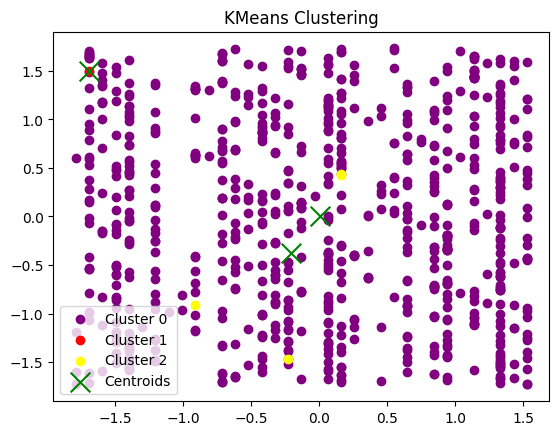

In [42]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], c='purple', label='Cluster 0')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], c='yellow', label='Cluster 2')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='green', label='Centroids')

plt.title('KMeans Clustering')
plt.legend()
plt.show()


### Sample prediction

In [35]:
df.head(3)

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes,Cluster
0,1,3,0,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0
1,1,28,0,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,0
2,1,154,0,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,0


In [36]:
df.iloc[0].values

array([   1,    3,    0,  101,   60,   17,   50,    0,   50,   46,   30,
         16,    9,    0,   41,  198,  199,   22,  177,   78,   16,  104,
          1,   30, 1131,   16,  149,   34,  175,    0,  181, 1518, 4154,
          0], dtype=int64)

In [37]:
test = kmeans.predict(np.asarray([[1,    3,    0,  101,   60,   17,   50,    0,   50,   46,   30,
                                  16,    9,    0,   41,  198,  199,   22,  177,   78,   16,  104,
                                   1,   30, 1131,   16,  149,   34,  175,    0,  181, 1518, 4154]]))
predicted_cluster = test[0]
print(f"The predicted cluster for the new data point is: {predicted_cluster}")

The predicted cluster for the new data point is: 1


In [43]:
df.iloc[100].values

array([   4,  575,    0,  434,  581,   30,   27,    0,   27,  197,   11,
        186,   91,   31,  414,  426, 1568,  399, 1169,  506,  196,  331,
         12,   54,  354,   90,   47,    0,  152,   39,  178, 2825, 8583,
          0], dtype=int64)

In [49]:
test = kmeans.predict(np.asarray([[4,  575,    0,  434,  581,   30,   27,    0,   27,  197,   11,
                                  186,   91,   31,  414,  426, 1568,  399, 1169,  506,  196,  331,
                                  12,   54,  354,   90,   47,    0,  152,   39,  178, 2825, 8583,]]))
predicted_cluster = test[0]
print(f"The predicted cluster for the new data point is: {predicted_cluster}")

The predicted cluster for the new data point is: 1


In [38]:
sensitive_areas = df[y_kmeans ==0]
sensitive_areas  

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes,Cluster
0,1,3,0,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0
1,1,28,0,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,0
2,1,154,0,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,0
3,1,172,0,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0
4,1,220,0,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,34,78,11,15,35,4,13,0,13,53,...,0,9,58,8,320,0,0,1765,3446,0
804,34,111,11,89,49,18,36,0,36,214,...,143,20,88,2,989,0,124,2961,6608,0
805,34,352,11,30,23,5,21,0,21,21,...,11,6,28,0,47,0,51,264,711,0
806,34,686,11,32,6,6,21,0,21,123,...,812,3,35,12,370,0,69,385,3023,0


In [39]:
moderate_areas = df[y_kmeans ==1]
moderate_areas  

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes,Cluster
28,1,753,0,2602,1555,136,871,0,871,1182,...,34947,420,3544,2271,5791,7,7400,34344,130089,1


In [40]:
peaceful_areas = df[y_kmeans ==2]
peaceful_areas  

,StateUT,District,Year,Murder,AttemptToMurder,CulpableHomicide,Rape,CustodialRape,OtherRape,KidnappingAbduction,...,Hurt,DowryDeaths,AssaultWomen,InsultToModestyOfWomen,CrueltyByHusbandHisRelatives,ImportationGirlsFromForeignCountries,CausingDeathByNegligence,OtherIPCcrimes,TotalIPCcrimes,Cluster
243,16,61,0,221,327,5,40,0,40,152,...,3735,40,223,51,229,0,38,11106,27254,2
353,20,504,0,295,200,6,127,0,127,148,...,3845,18,274,44,198,0,709,6095,28968,2
658,9,191,0,547,510,63,381,0,381,1627,...,2011,113,502,90,138,0,432,22000,54384,2
702,20,505,5,239,135,5,165,0,165,190,...,3797,17,357,102,327,1,778,7138,31070,2


In [41]:
kmeans.cluster_centers_

array([[ 3.12671685e-03,  1.86866776e-05,  4.71781058e-04,
        -4.38158185e-02, -3.99546023e-02, -2.35063009e-02,
        -4.47339136e-02,  2.19188463e-04, -4.47339676e-02,
        -4.66503801e-02, -4.22132689e-02, -4.89945166e-02,
        -2.95965570e-02, -3.64764892e-02, -5.39061875e-02,
        -6.21855252e-02, -6.85274298e-02, -6.18574287e-02,
        -6.85731264e-02, -2.09594440e-02, -5.94026087e-02,
        -5.84305785e-02, -6.27583923e-02, -2.95152472e-02,
        -4.34701168e-02, -3.48026317e-02, -4.18648672e-02,
        -3.54903650e-02, -3.45935272e-02, -4.95281194e-03,
        -3.88832820e-02, -5.00937846e-02, -5.69663823e-02],
       [-1.69079759e+00,  1.49839659e+00, -4.12144821e-01,
         2.46428233e+01,  1.93853274e+01,  1.30169106e+01,
         2.08078658e+01, -3.52016672e-02,  2.08078333e+01,
         1.37706403e+01,  1.39157123e+01,  1.21400085e+01,
         1.43336279e+01,  7.83784085e-01,  1.24260472e+01,
         2.00974433e+01,  1.41567344e+01,  7.51066654e+

### Not Happy with the outcome so will go ahead with DBSCAN